In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
x = pd.read_csv('train_x.csv')
y = pd.read_csv('train_y.csv')

In [16]:
print(x['lon'].max())
print(x['lon'].min())

0.99875
0.0


In [17]:
print(x['lat'].max())
print(x['lat'].min())

0.99875
0.0


In [2]:
x

NameError: name 'x' is not defined

In [6]:
y

,pm25
0,36.203168
1,55.946348
2,12.042066
3,48.804589
4,11.136404
...,...
15184,28.158460
15185,36.928889
15186,36.641309
15187,18.662634


(array([ 864., 1950., 1651., 1259.,  981., 1260., 2234., 1543., 2625.,
         822.]),
 array([-1.76254691,  4.90332617, 11.56919924, 18.23507231, 24.90094538,
        31.56681845, 38.23269152, 44.89856459, 51.56443766, 58.23031074,
        64.89618381]),
 <BarContainer object of 10 artists>)

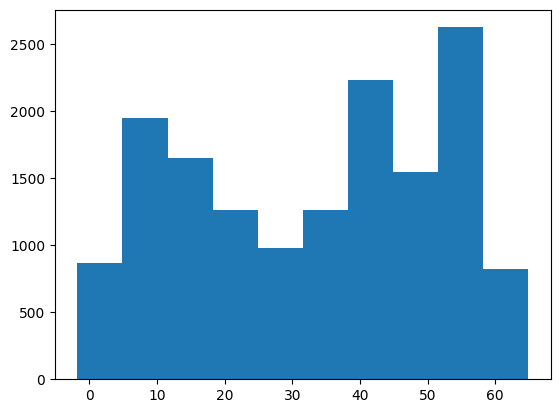

In [70]:
plt.hist(y)

(array([8186.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7003.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

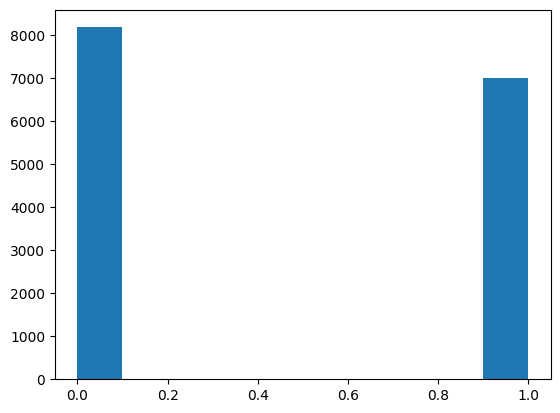

In [13]:
plt.hist(x['id'])

In [18]:
x

,lon,lat,id
0,0.85750,0.68625,1.0
1,0.41125,0.67500,1.0
2,0.86250,0.90625,1.0
3,0.81125,0.81000,0.0
4,0.46875,0.11625,0.0
...,...,...,...
15184,0.39500,0.52375,1.0
15185,0.29000,0.48125,1.0
15186,0.13500,0.64000,1.0
15187,0.07125,0.78875,0.0


In [21]:
import numpy as np

In [1]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(np.array(x['lat'])*100, np.array(x['lon'])*100, c = np.array(x['id']))
plt.savefig('map.png')

NameError: name 'plt' is not defined

In [30]:
plt.savefig('map.png')

<Figure size 640x480 with 0 Axes>

In [32]:
y

,pm25
0,36.203168
1,55.946348
2,12.042066
3,48.804589
4,11.136404
...,...
15184,28.158460
15185,36.928889
15186,36.641309
15187,18.662634


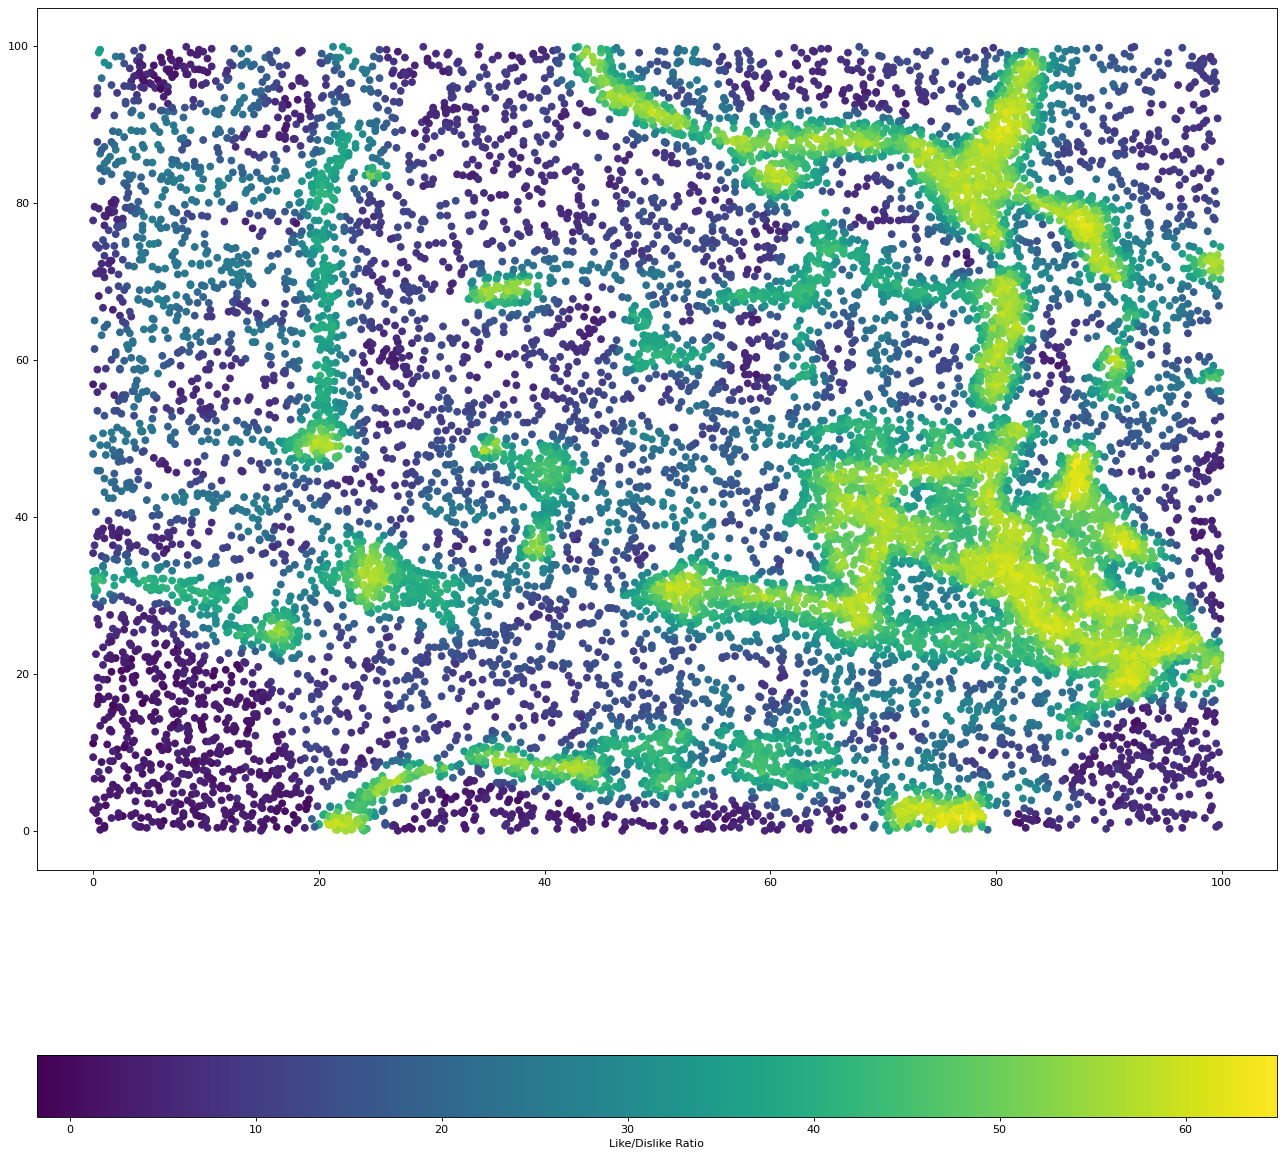

In [33]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(np.array(x['lat'])*100, np.array(x['lon'])*100, c = np.array(y['pm25'])) 

plt.colorbar(label="Like/Dislike Ratio", orientation="horizontal") 
plt.show() 

In [41]:
tmp = np.random.random((1000, 1000))

In [42]:
np.linalg.inv(tmp)

array([[-9.57687735e-03,  9.13355545e-02, -4.75069493e-02, ...,
        -2.11063811e-01, -1.21574265e-01,  2.75050139e-02],
       [ 7.24870295e-02, -2.90843322e-02, -6.47309894e-02, ...,
         5.30731881e-02,  1.55926899e-03, -3.54499442e-02],
       [-3.90116123e-02, -4.01372048e-01,  1.38595167e-01, ...,
         7.27346343e-02,  1.23709546e-01,  4.80709805e-02],
       ...,
       [ 2.88745164e-01,  1.36592630e-01, -1.05809728e-01, ...,
        -2.12830055e-01, -1.45381980e-01,  9.95756846e-02],
       [ 1.89996282e-01,  1.66414166e-02, -9.94170647e-02, ...,
        -1.90133759e-02, -2.76024260e-02, -5.55577242e-02],
       [-9.62566459e-01, -2.05648309e+00,  1.01315217e+00, ...,
         9.42413355e-01,  1.16421436e+00,  8.25854423e-01]])

In [43]:
x.shape

(15189, 3)

In [66]:
p = 0.9
mask = np.random.binomial(1, 0.1, x.shape[0]).astype(np.bool)

C:\Users\aoezkan\AppData\Local\Temp\ipykernel_9936\3242810910.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.random.binomial(1, 0.1, x.shape[0]).astype(np.bool)


In [68]:
x_samp = x[mask]
y_samp = y[mask]

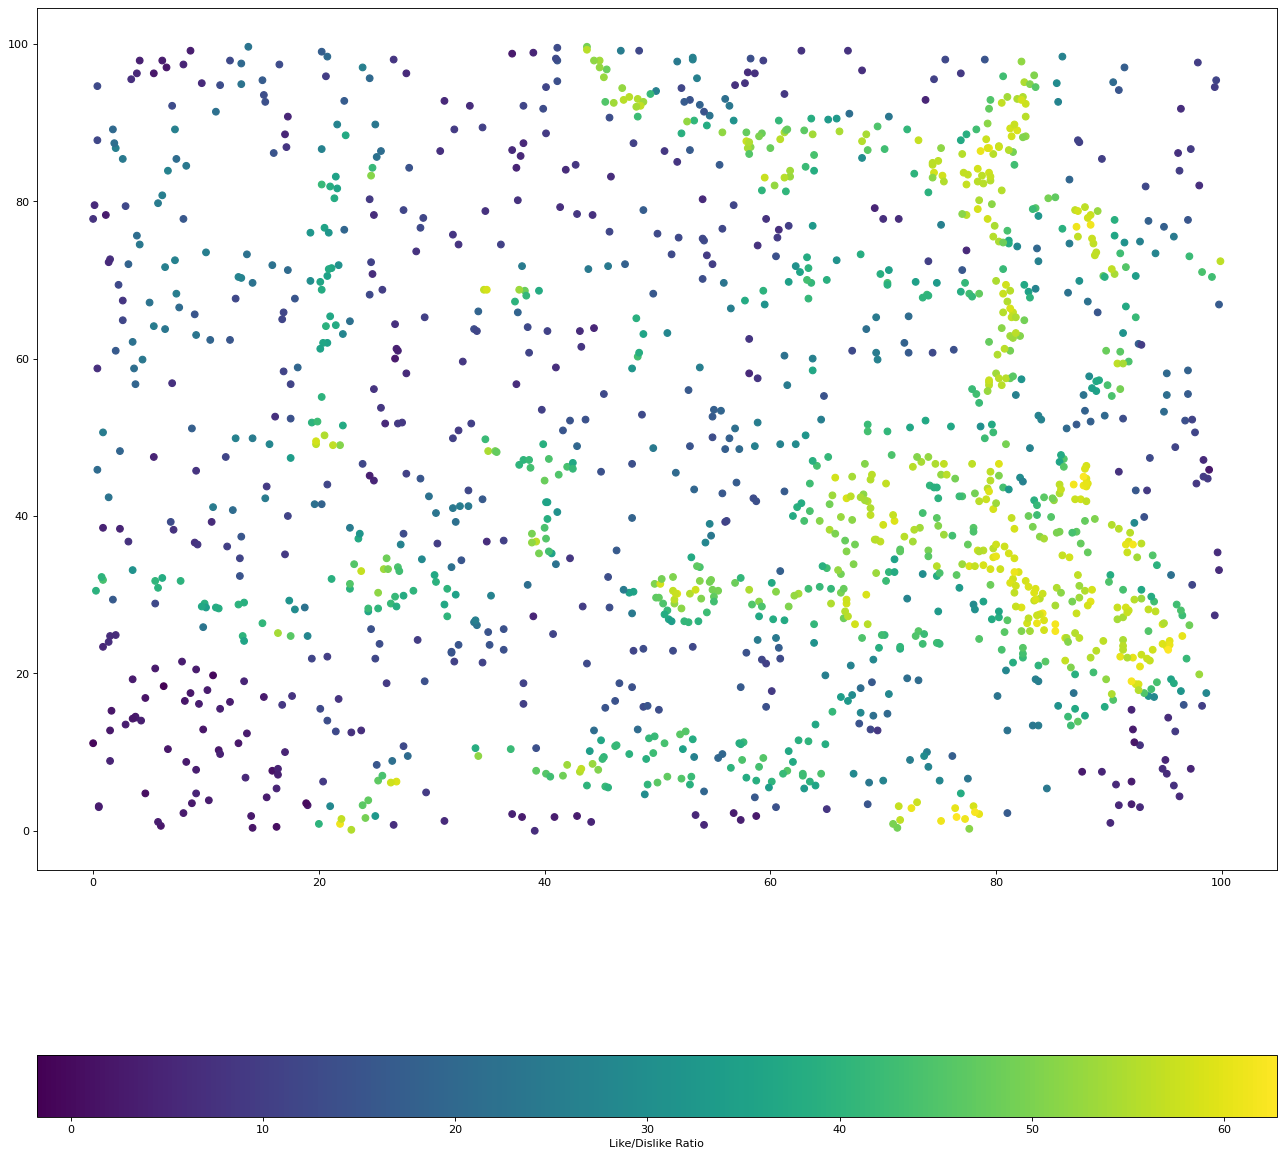

In [69]:
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(np.array(x_samp['lat'])*100, np.array(x_samp['lon'])*100, c = np.array(y_samp['pm25'])) 

plt.colorbar(label="Like/Dislike Ratio", orientation="horizontal") 
plt.show() 

In [75]:
import os
import typing
from sklearn.gaussian_process.kernels import *
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from matplotlib import cm


# Set `EXTENDED_EVALUATION` to `True` in order to visualize your predictions.
EXTENDED_EVALUATION = False
EVALUATION_GRID_POINTS = 300  # Number of grid points used in extended evaluation

# Cost function constants
COST_W_UNDERPREDICT = 50.0
COST_W_NORMAL = 1.0


In [76]:
def extract_city_area_information(train_x: np.ndarray, test_x: np.ndarray) -> typing.Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Extracts the city_area information from the training and test features.
    :param train_x: Training features
    :param test_x: Test features
    :return: Tuple of (training features' 2D coordinates, training features' city_area information,
        test features' 2D coordinates, test features' city_area information)
    """
    train_x_2D = np.zeros((train_x.shape[0], 2), dtype=float)
    train_x_AREA = np.zeros((train_x.shape[0],), dtype=bool)
    test_x_2D = np.zeros((test_x.shape[0], 2), dtype=float)
    test_x_AREA = np.zeros((test_x.shape[0],), dtype=bool)

    #TODO: Extract the city_area information from the training and test features

    assert train_x_2D.shape[0] == train_x_AREA.shape[0] and test_x_2D.shape[0] == test_x_AREA.shape[0]
    assert train_x_2D.shape[1] == 2 and test_x_2D.shape[1] == 2
    assert train_x_AREA.ndim == 1 and test_x_AREA.ndim == 1

    return train_x_2D, train_x_AREA, test_x_2D, test_x_AREA

In [78]:
train_x = np.loadtxt('train_x.csv', delimiter=',', skiprows=1)
train_y = np.loadtxt('train_y.csv', delimiter=',', skiprows=1)
test_x = np.loadtxt('test_x.csv', delimiter=',', skiprows=1)

# Extract the city_area information
train_x_2D, train_x_AREA, test_x_2D, test_x_AREA = extract_city_area_information(train_x, test_x)
# Fit the model
print('Fitting model')
# model = Model()
# model.fitting_model(train_y,train_x_2D)

# Predict on the test features
print('Predicting on test features')
# predictions = model.make_predictions(test_x_2D, test_x_AREA)
# print(predictions)

Fitting model
Predicting on test features


In [82]:
(test_x_AREA)

array([False, False, False, ..., False, False, False])

In [84]:
np.sum(train_x_AREA)

0

In [80]:
train_x_AREA.shape

(15189,)

In [81]:
train_x_2D.shape

(15189, 2)